In [4]:
# wczytanie danych
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(url, sep=r'\s+', names=names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Statystyki opisowe
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

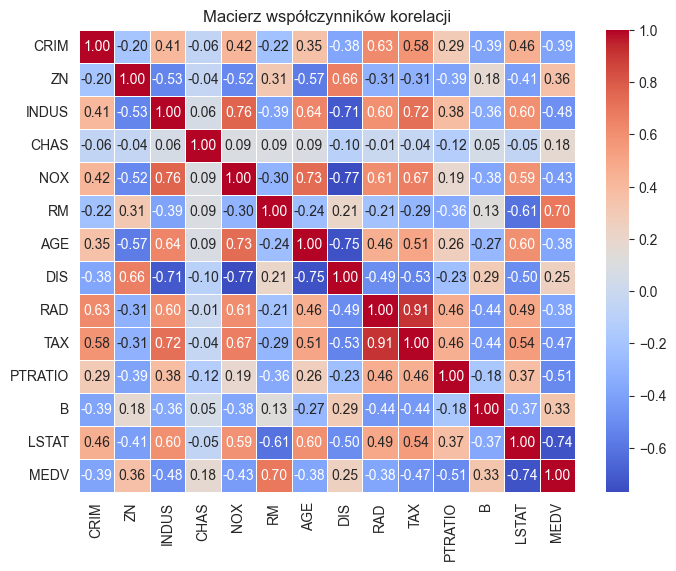

In [7]:
macierz_wsp_korelacji = dataset.corr(method='pearson')
#print(macierz_wsp_korelacji)

plt.figure(figsize=(8, 6))
sns.heatmap(
    macierz_wsp_korelacji,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar=True,

)

plt.title('Macierz współczynników korelacji')
plt.show()

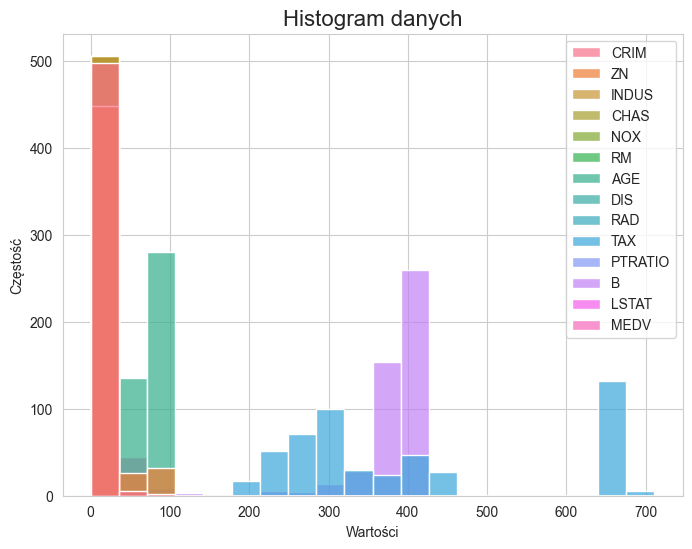

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(
    dataset,
    bins=20,
    color="teal",
    alpha=0.7
)

plt.title("Histogram danych", fontsize=16)
plt.xlabel("Wartości")
plt.ylabel("Częstość")
plt.show()

<Figure size 800x600 with 0 Axes>

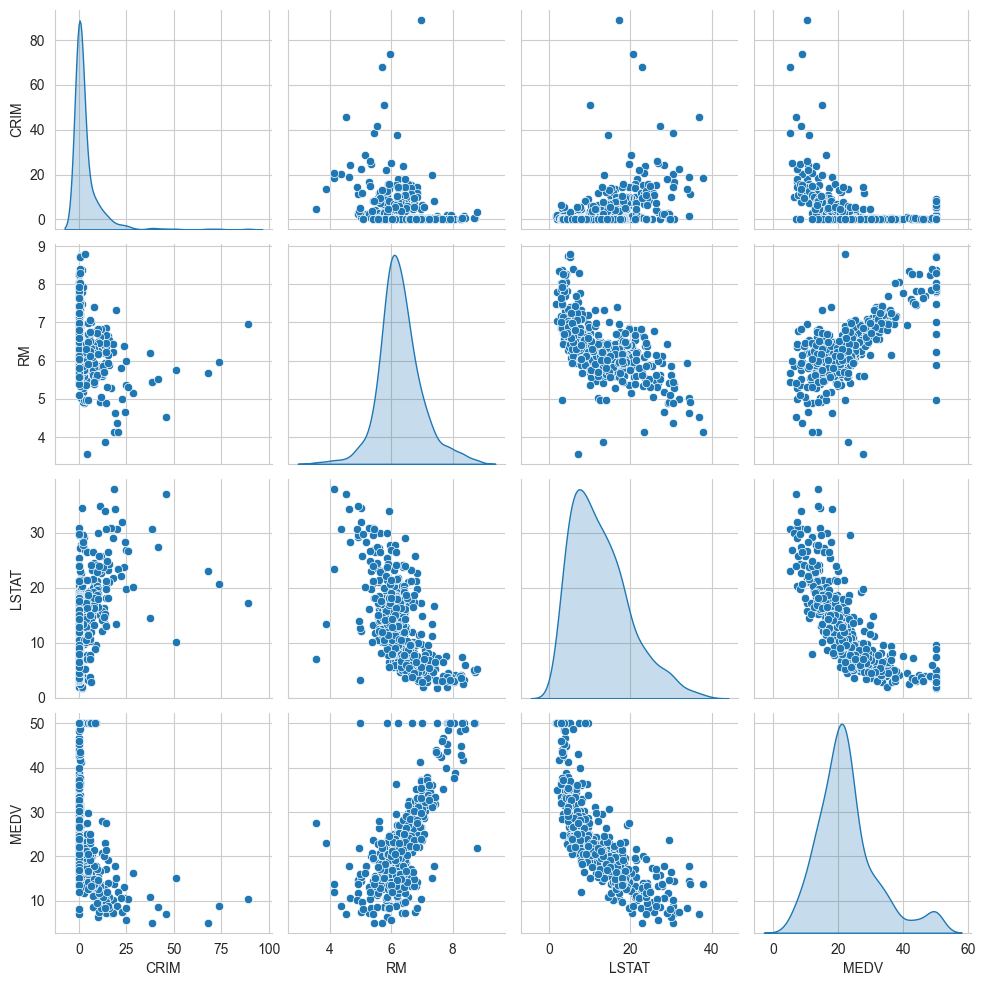

In [9]:
plt.figure(figsize=(8,6))
cols = ['CRIM', 'RM', 'LSTAT', 'MEDV'] # wybrane najważniejsze zmienne

sns.pairplot(
    dataset[cols],
    diag_kind='kde'
    )

plt.show()

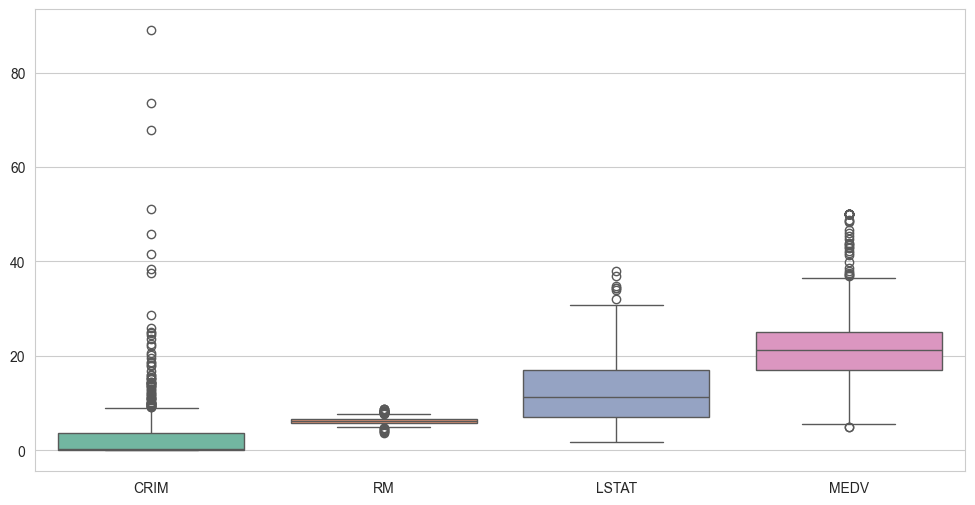

In [10]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=dataset[['CRIM','RM','LSTAT','MEDV']],
    palette='Set2'
    )

plt.show()

In [11]:
# podział danych
from sklearn.model_selection import train_test_split

X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# podział danych
from sklearn.model_selection import train_test_split

X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Regresja liniowa
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# XGBoost
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.3
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [24]:
# GridSearchCV dla XGBoost
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3)

grid = GridSearchCV(estimator=xg_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best score: %f using params: %s" % (grid.best_score_, grid.best_params_))

Best score: -13.637975 using params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [27]:
# Ewaluacja modeli
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regresja liniowa
y_pred_lr = lr.predict(X_test)
print('Linear Regression - MSE: ', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression - MAE: ', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression - R2: ', r2_score(y_test, y_pred_lr))

best_xg = grid.best_estimator_

# XGBoost
y_pred_xg = best_xg.predict(X_test)
print('XGBoost - MSE: ', mean_squared_error(y_test, y_pred_xg))
print('XGBoost - MAE: ', mean_absolute_error(y_test, y_pred_xg))
print('XGBoost - R2: ', r2_score(y_test, y_pred_xg))

Linear Regression - MSE:  24.291119474973538
Linear Regression - MAE:  3.1890919658878416
Linear Regression - R2:  0.6687594935356317
XGBoost - MSE:  9.97201966835618
XGBoost - MAE:  2.079857303581986
XGBoost - R2:  0.8640187477229251


In [28]:
# obliczanie reszt
residuals = y_test - y_pred_lr

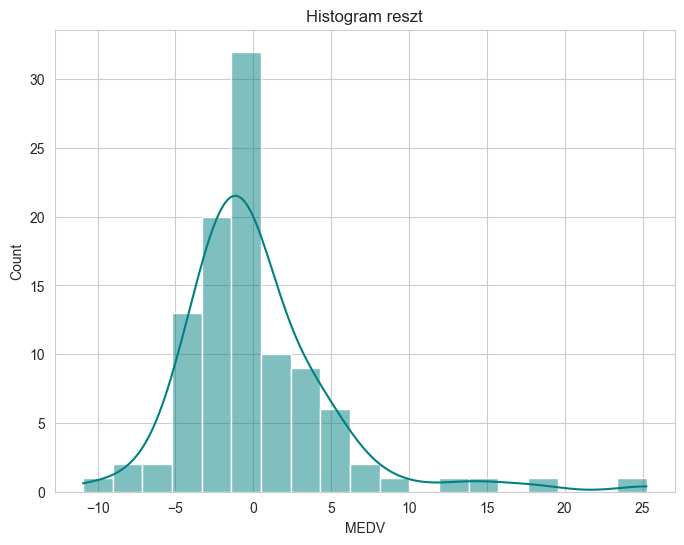

In [29]:
# histogram reszt

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='teal')
plt.title('Histogram reszt')
plt.show()

In [33]:
# Histogram reszt jest zbliżony do rozkładu normalnego, jednakże posiada skośność prawostronną.

<Figure size 800x600 with 0 Axes>

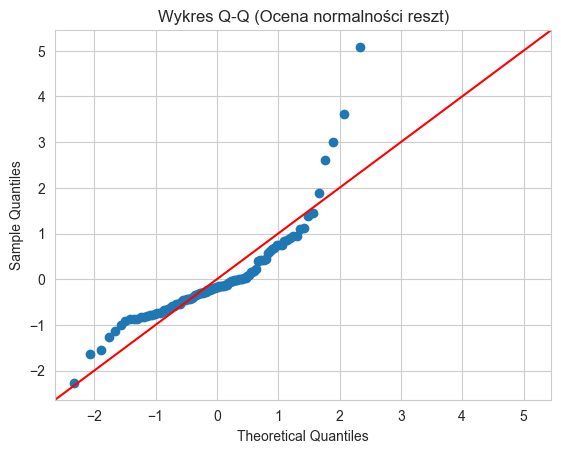

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Tworzenie Q-Q Plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Wykres Q-Q (Ocena normalności reszt)')
plt.show()

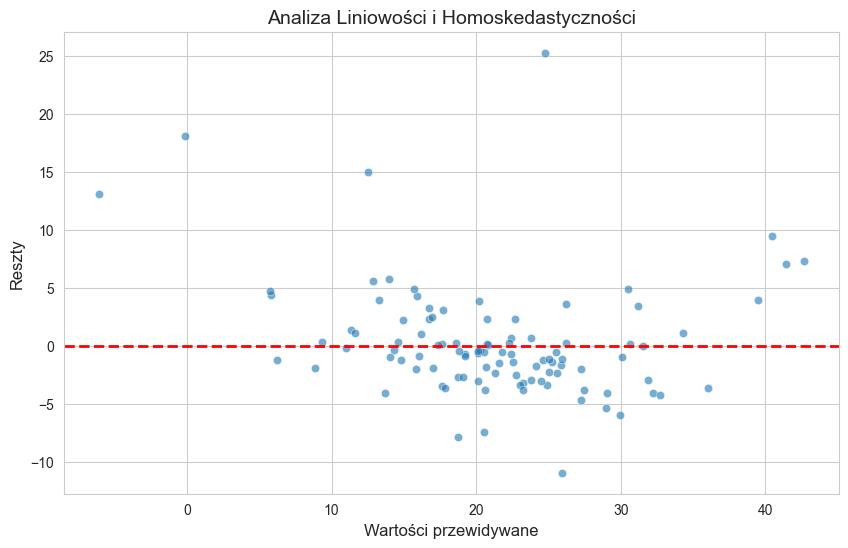

In [36]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_pred_lr, y=residuals, alpha=0.6)

plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.xlabel('Wartości przewidywane', fontsize=12)
plt.ylabel('Reszty', fontsize=12)
plt.title('Analiza Liniowości i Homoskedastyczności', fontsize=14)
plt.show()

In [38]:
#Dużo wartości odstających informuje, że model nie poradził sobie dobrze z niektórymi obserwacjami.
